<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Support%20vector%20machine(Forestfires).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [64]:
path = r"/content/forestfires.csv"

In [65]:
data = pd.read_csv(path)

In [66]:
print(data.head())


  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  

In [67]:
print(data.describe())

             FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818   

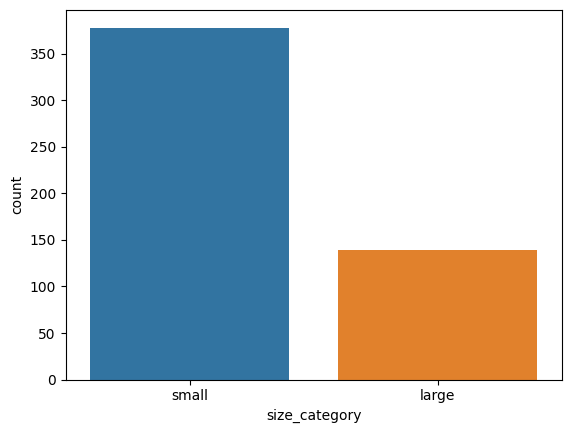

In [68]:
sns.countplot(x="size_category", data=data)
plt.show()

In [69]:
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()

In [70]:
data[non_numeric_cols] = data[non_numeric_cols].astype('category')

In [71]:
label_encoder = LabelEncoder()
for column in non_numeric_cols:
    data[column] = label_encoder.fit_transform(data[column])

In [72]:
X = data.drop("size_category", axis=1)
y = data["size_category"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

In [75]:
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [76]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [77]:
svm_model = SVC(**best_params)
svm_model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [78]:
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27  1]
 [ 1 75]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.99      0.99      0.99        76

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [80]:
correlation = data_encoded.corr()
plt.figure(figsize=(120, 80))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

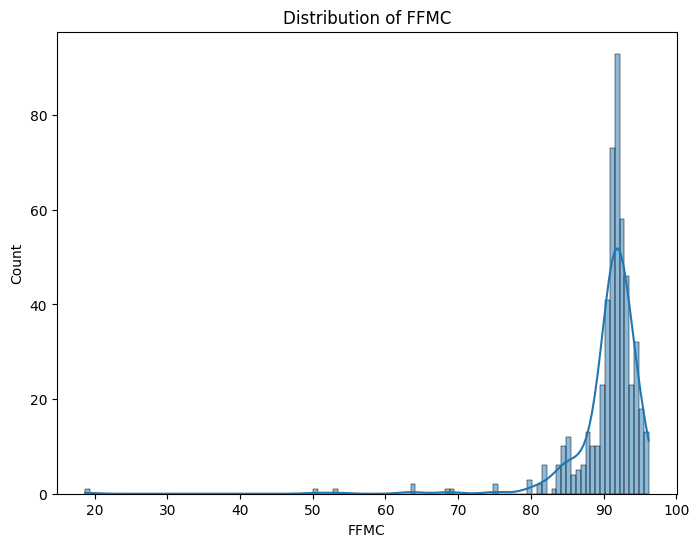

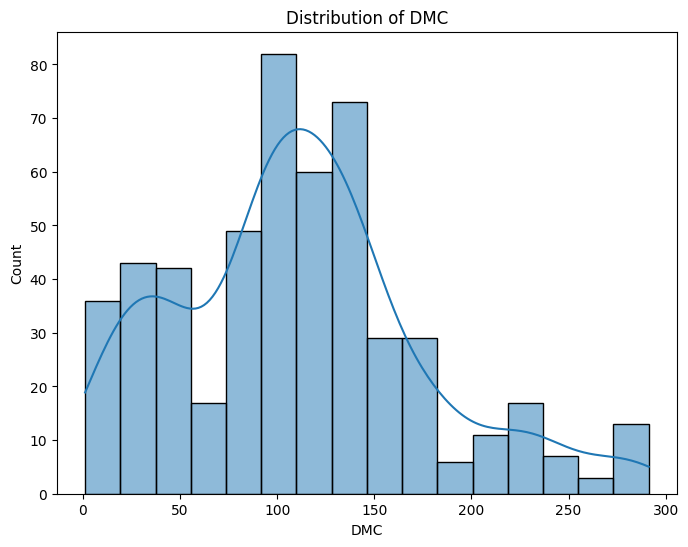

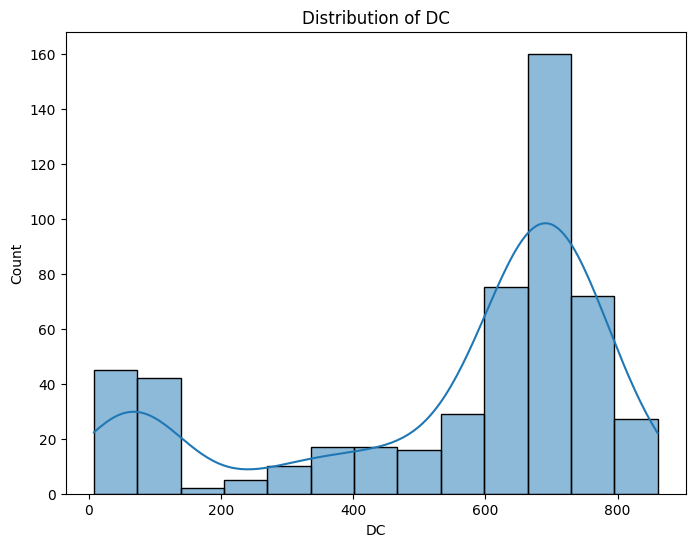

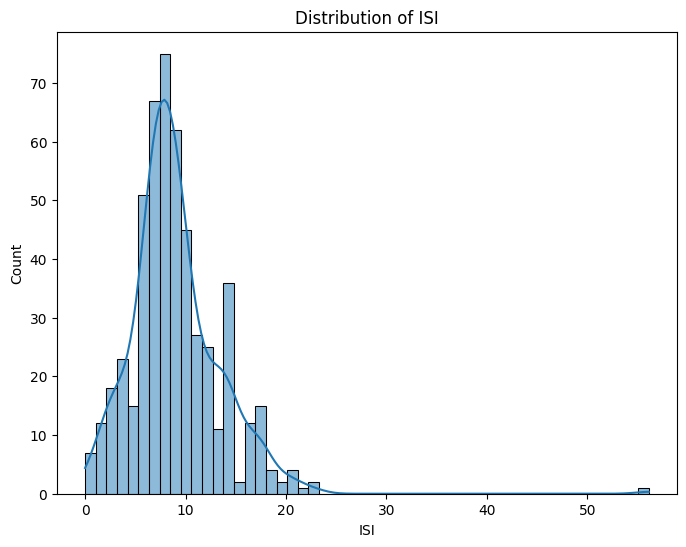

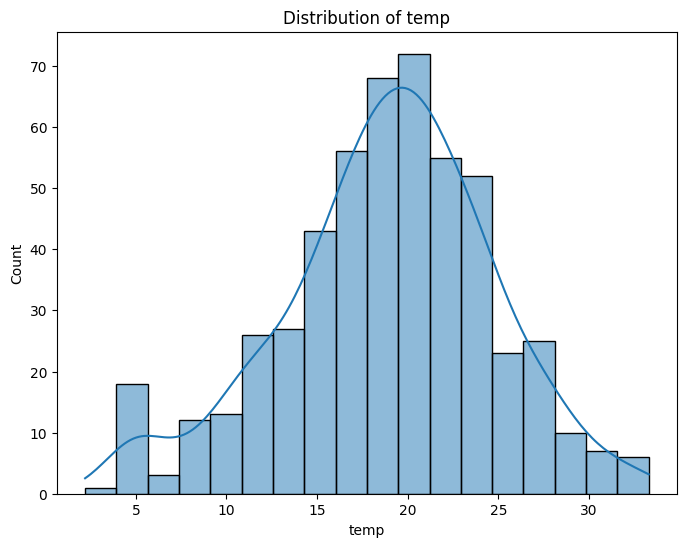

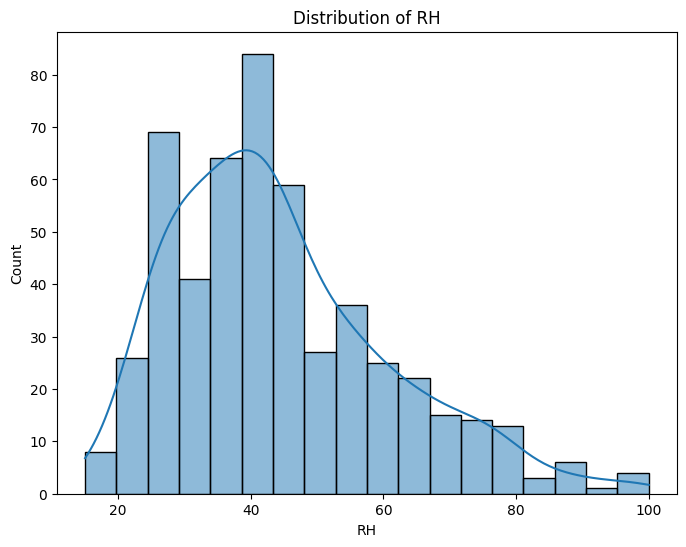

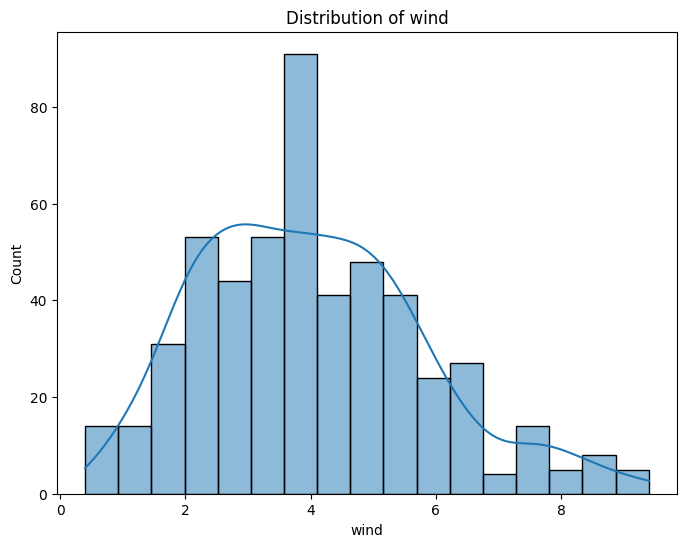

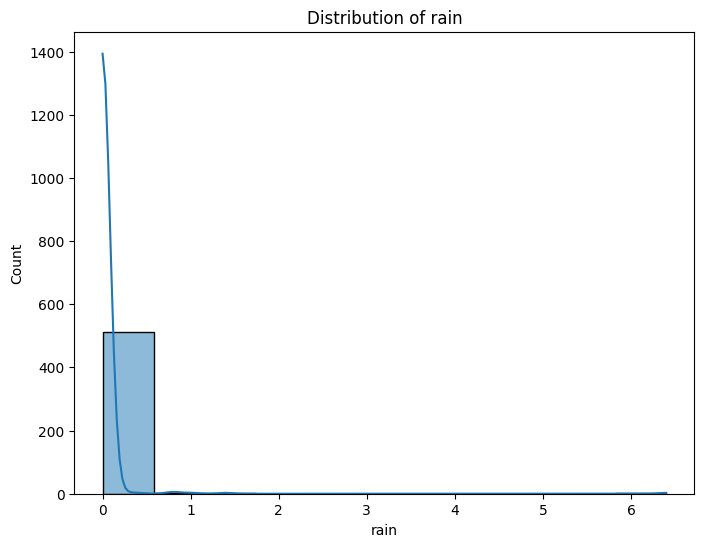

In [81]:
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()